In [1190]:
import pandas as pd


In [1191]:
df = pd.read_csv('Divar.csv', low_memory=False)
cities = pd.read_csv('iran_city_classification.csv')


In [1192]:
cities.head()

,نام شهر,دسته‌بندی
0,karaj,کلان‌شهر
1,tehran,کلان‌شهر
2,mashhad,کلان‌شهر
3,ahvaz,کلان‌شهر
4,kermanshah,کلان‌شهر


In [1193]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge cities with Divar based on city_slug

In [1194]:
cities = cities.rename(columns={'نام شهر': 'city_slug', 'دسته‌بندی': 'category'})
df = df.merge(cities, on='city_slug')

## Finding Missing Values

In [1195]:
non_null_counts = df.notnull().sum().sort_values(ascending=False)
non_null_percentages = (non_null_counts / len(df)) * 100


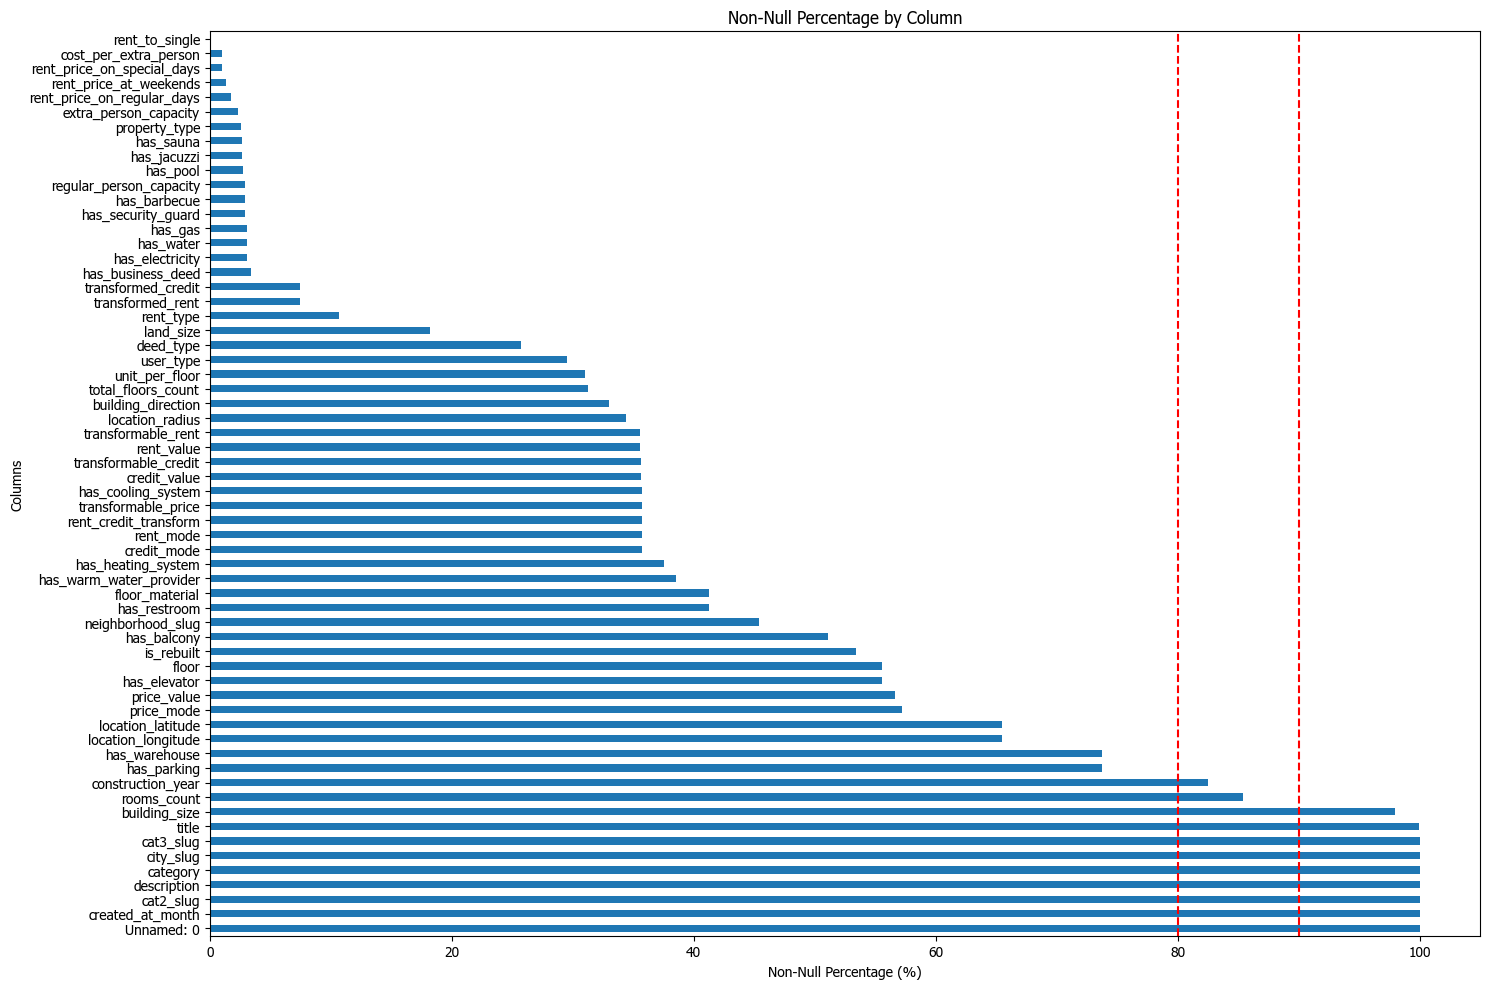

In [1196]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
non_null_percentages.plot(kind='barh')
plt.axvline(x = 80, color = 'r', ls='--')
plt.axvline(x = 90, color = 'r', ls='--')
plt.title('Non-Null Percentage by Column')
plt.xlabel('Non-Null Percentage (%)')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [1197]:
df[['title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',]].head()

,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
0,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,۶۰ متر قلهک فول امکانات,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN
3,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN
4,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1198]:
df.cat2_slug.value_counts()

cat2_slug
residential-sell        535023
residential-rent        270052
commercial-rent          74566
commercial-sell          36906
temporary-rent           27752
real-estate-services     18978
Name: count, dtype: int64

In [1199]:
df.cat3_slug.value_counts()

cat3_slug
apartment-sell                        299928
apartment-rent                        208957
plot-old                              120619
house-villa-sell                      114476
house-villa-rent                       61095
shop-rent                              44563
office-rent                            21277
shop-sell                              20920
presell                                15443
suite-apartment                        15407
villa                                  11821
industry-agriculture-business-sell     10874
industry-agriculture-business-rent      8725
office-sell                             5112
partnership                             3535
workspace                                524
Name: count, dtype: int64

In [1200]:
df.property_type.value_counts()

property_type
jungle             15638
beach               3555
other               3307
jungle-mountain     2063
mountain             146
Name: count, dtype: int64

In [1201]:
df1 = df.drop(['Unnamed: 0', 'cat2_slug', 'rent_to_single', 'rent_price_on_regular_days',
              'rent_price_on_special_days', 'rent_price_at_weekends', 'cost_per_extra_person',
              'extra_person_capacity', 'regular_person_capacity', 'title', 'description',
              'has_pool', 'has_jacuzzi', 'has_sauna', 'has_security_guard', 'has_barbecue',
              'has_water', 'has_electricity', 'has_gas', 'transformed_credit', 'transformable_rent','transformed_rent',
              'rent_credit_transform', 'has_business_deed', 'property_type', 'user_type'], axis=1)

In [1202]:
df1['rooms_count'].value_counts()

rooms_count
دو              393093
یک              186171
سه              136089
بدون اتاق        73051
چهار             20746
پنج یا بیشتر     13468
Name: count, dtype: int64

## Map rooms count from words into numbers

In [1203]:
room_dic = {'یک':1, 'دو':2, 'سه': 3, 'بدون اتاق':0, 'چهار': 4, 'پنج یا بیشتر': 5}
df1['rooms_count'] = df1['rooms_count'].map(room_dic)


In [1204]:
df1.rooms_count.value_counts()

rooms_count
2.0    393093
1.0    186171
3.0    136089
0.0     73051
4.0     20746
5.0     13468
Name: count, dtype: int64

In [1205]:
df1.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'created_at_month',
       'rent_mode', 'rent_value', 'rent_type', 'price_mode', 'price_value',
       'credit_mode', 'credit_value', 'transformable_price',
       'transformable_credit', 'land_size', 'building_size', 'deed_type',
       'floor', 'rooms_count', 'total_floors_count', 'unit_per_floor',
       'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
       'construction_year', 'is_rebuilt', 'has_warm_water_provider',
       'has_heating_system', 'has_cooling_system', 'has_restroom',
       'building_direction', 'floor_material', 'location_latitude',
       'location_longitude', 'location_radius', 'category'],
      dtype='object')

In [1206]:
df1['rent_type'].value_counts()

rent_type
rent_credit    103048
full_credit       144
Name: count, dtype: int64

In [1207]:
df1['rent_mode'].value_counts()

rent_mode
مقطوع     284690
مجانی      58177
توافقی      1625
Name: count, dtype: int64

In [1208]:
df1[df1['credit_mode']=='مقطوع'][['transformable_credit', 'price_value']]

,transformable_credit,price_value
2,7.500000e+08,NaN
3,9.500000e+08,NaN
5,2.500000e+08,NaN
6,1.500000e+08,NaN
11,1.200000e+09,NaN
...,...,...
963262,2.200000e+08,NaN
963264,3.000000e+07,NaN
963270,1.500000e+08,NaN
963273,1.000000e+09,NaN


In [1209]:
df1[df1['rent_mode']=='مجانی']['transformable_credit']

11        1.200000e+09
38        2.500000e+08
48        1.500000e+09
65        2.500000e+09
92        1.200000e+09
              ...     
963228    5.000000e+08
963236    3.600000e+08
963240    3.100000e+08
963246    4.600000e+08
963276    3.500000e+08
Name: transformable_credit, Length: 58177, dtype: float64

In [1210]:
df1['has_balcony'].value_counts()

has_balcony
true        382337
false        84877
True         20194
False         4321
unselect       207
Name: count, dtype: int64

In [1211]:
df1.construction_year.value_counts()

construction_year
۱۴۰۳           113120
۱۳۹۰            57381
۱۴۰۲            56835
۱۴۰۰            52210
۱۳۹۵            51540
۱۳۹۸            37329
۱۳۹۷            35540
۱۳۹۶            34694
۱۴۰۱            34530
۱۳۸۵            33335
۱۳۹۹            28890
۱۳۹۳            28387
۱۳۹۴            25438
۱۳۹۲            25334
۱۳۸۸            23804
۱۳۸۰            22809
قبل از ۱۳۷۰     19688
۱۳۸۹            16391
۱۳۹۱            15870
۱۳۸۷            13867
۱۳۸۶            13181
۱۳۸۳             9746
۱۳۸۴             8367
۱۳۷۵             7009
۱۳۸۲             6834
۱۳۷۱             5316
۱۳۸۱             3523
۱۳۷۸             2952
۱۳۷۹             2349
۱۳۷۷             2037
۱۳۷۲             1837
۱۳۷۳             1769
۱۳۷۶             1544
۱۳۷۴             1245
Name: count, dtype: int64

In [1212]:
df1.loc[df1.construction_year=='قبل از ۱۳۷۰', 'construction_year'] = 1369
df1.construction_year = df1.construction_year.astype('float')


In [1213]:
df1['full_price'] = df1['price_value']

df1['full_credit'] = df1['credit_value'] + (df1['rent_value']/3)*100
df1['full_credit']

0                  NaN
1                  NaN
2         1.616667e+09
3         4.116667e+09
4                  NaN
              ...     
963272             NaN
963273    2.500000e+09
963274             NaN
963275             NaN
963276    3.500000e+08
Name: full_credit, Length: 963277, dtype: float64

In [1214]:
this_year = max(df1.construction_year.value_counts().index)

def find_full_price(x):
    if x['full_price'] is not None:
        return x['full_price']
    if x['construction_year'] is None:
        return x['full_credit']*5
    elif this_year - x['construction_year'] < 5:
        return x['full_credit']*4
    elif this_year - x['construction_year'] < 10:
        return x['full_credit']*5
    else:
        return x['full_credit']*6

In [1215]:
df1['full_price'] = df1.apply(find_full_price, axis=1)

In [1216]:
df1['full_price'].isna().sum()

np.int64(417303)

In [1217]:
df2 = df1.dropna(subset=['full_price']).reset_index().drop(['index', 'rent_mode', 'rent_type', 'price_mode', 'rent_value', 'credit_value',
       'price_value', 'credit_mode', 'transformable_price', 'transformable_credit', 'full_credit'], axis=1)

In [1218]:
df2.full_price = df2.full_price/1000000

In [1219]:
(df2.sort_values(by='full_price')['full_price']<100).sum()

np.int64(15637)

{'whiskers': [<matplotlib.lines.Line2D at 0x8367b96d0>,
 'caps': [<matplotlib.lines.Line2D at 0x8367b8fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x8367ba250>],
 'medians': [<matplotlib.lines.Line2D at 0x3cade6f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x3cae59890>],
 'means': []}

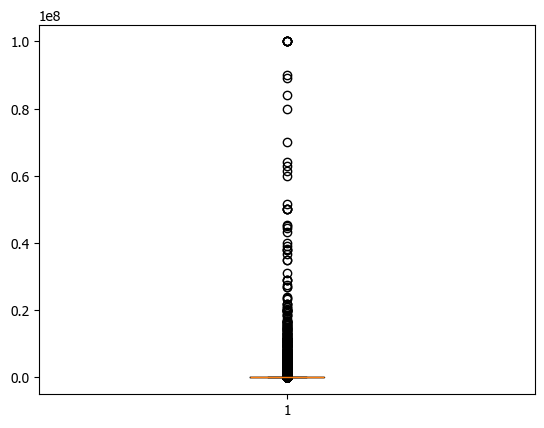

In [1220]:
plt.boxplot(df2.full_price)

In [1221]:
df2 = df2.drop(df2[(df2.full_price<50)|(df2.full_price>5e9)].index)

In [1222]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531417 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                531417 non-null  object 
 1   city_slug                531417 non-null  object 
 2   neighborhood_slug        229518 non-null  object 
 3   created_at_month         531417 non-null  object 
 4   land_size                108757 non-null  float64
 5   building_size            530195 non-null  float64
 6   deed_type                241719 non-null  object 
 7   floor                    298414 non-null  object 
 8   rooms_count              431136 non-null  float64
 9   total_floors_count       182095 non-null  object 
 10  unit_per_floor           179938 non-null  object 
 11  has_balcony              297902 non-null  object 
 12  has_elevator             298414 non-null  object 
 13  has_warehouse            407175 non-null  object 
 14  has_parki

{'whiskers': [<matplotlib.lines.Line2D at 0x8c1f9dad0>,
 'caps': [<matplotlib.lines.Line2D at 0x8c1f9c5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x8c1f9f3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x83845ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x83845d750>],
 'means': []}

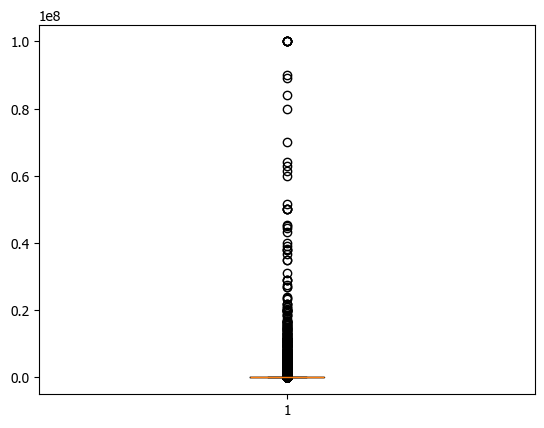

In [1223]:
plt.boxplot(df2.full_price)

<Axes: >

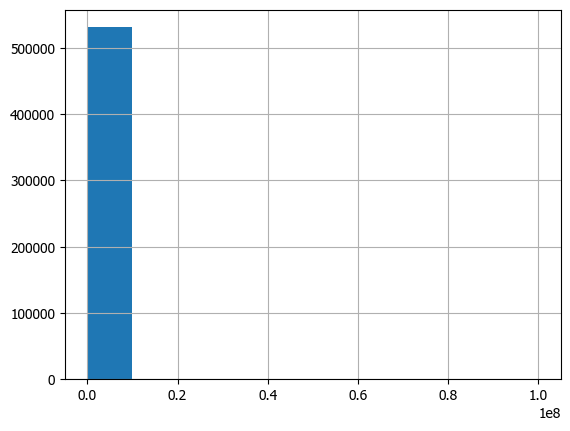

In [1224]:
df2.full_price.hist()

In [1225]:
import numpy as np
def replace_outliers(df, c_name):
    c = df[c_name]
    df[c_name] = df[c_name].astype(float)
    q1 = c.quantile(0.25)
    q3 = c.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    c = np.where(c>upper, upper, c)
    c = np.where(c<lower, lower, c)
    df.loc[:, c_name] = c
    return df

In [1226]:
df2 = replace_outliers(df2, 'full_price')

{'whiskers': [<matplotlib.lines.Line2D at 0x3cef42a50>,
 'caps': [<matplotlib.lines.Line2D at 0x8c2fcc450>,
 'boxes': [<matplotlib.lines.Line2D at 0x3cef426d0>],
 'medians': [<matplotlib.lines.Line2D at 0x8c2fcd650>],
 'fliers': [<matplotlib.lines.Line2D at 0x8c2fce3d0>],
 'means': []}

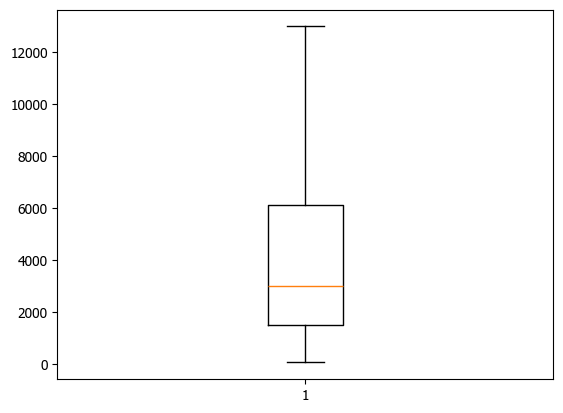

In [1227]:
plt.boxplot(df2.full_price)

<Axes: >

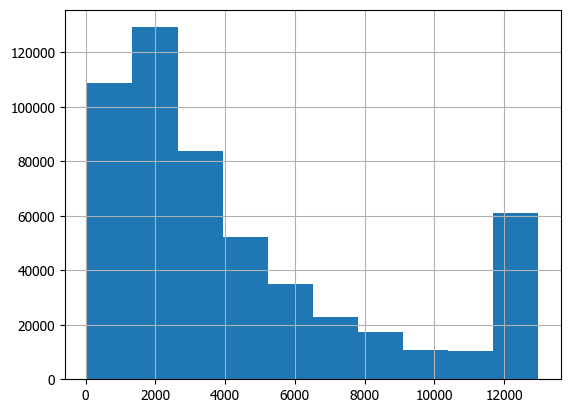

In [1228]:
df2.full_price.hist()

In [1229]:
df2.sort_values(by='full_price')

,cat3_slug,city_slug,neighborhood_slug,created_at_month,land_size,building_size,deed_type,floor,rooms_count,total_floors_count,...,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,location_latitude,location_longitude,location_radius,category,full_price
228978,plot-old,yazd,NaN,2024-07-01 00:00:00,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.688332,50.979565,NaN,شهر کوچک,50.0
179523,apartment-sell,mashhad,bolvartoos,2024-10-01 00:00:00,NaN,50.0,NaN,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,کلان‌شهر,50.0
102470,plot-old,karaj,shahinvilla,2024-10-01 00:00:00,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.847485,50.950539,NaN,کلان‌شهر,50.0
400040,plot-old,mahmudabad,NaN,2024-07-01 00:00:00,NaN,228.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.561268,52.288471,500.0,شهر کوچک,50.0
91029,house-villa-sell,yazd,NaN,2024-12-01 00:00:00,160.0,300.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهر کوچک,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182106,plot-old,tehran,mirdamad,2024-06-01 00:00:00,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.762489,51.429859,500.0,کلان‌شهر,12985.0
182111,apartment-sell,mashhad,azadshahr,2024-12-01 00:00:00,NaN,175.0,single_page,5,3.0,6,...,duct_split,duct_split,squat_seat,south,stone,36.322556,59.527782,NaN,کلان‌شهر,12985.0
383141,apartment-sell,tehran,zafaraniyeh,2024-10-01 00:00:00,NaN,210.0,NaN,4,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,35.808865,51.415756,NaN,کلان‌شهر,12985.0
492085,house-villa-sell,khorramshahr,NaN,2024-12-01 00:00:00,200.0,170.0,single_page,NaN,3.0,NaN,...,NaN,NaN,squat_seat,north,ceramic,NaN,NaN,NaN,شهر کوچک,12985.0


In [1230]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531417 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                531417 non-null  object 
 1   city_slug                531417 non-null  object 
 2   neighborhood_slug        229518 non-null  object 
 3   created_at_month         531417 non-null  object 
 4   land_size                108757 non-null  float64
 5   building_size            530195 non-null  float64
 6   deed_type                241719 non-null  object 
 7   floor                    298414 non-null  object 
 8   rooms_count              431136 non-null  float64
 9   total_floors_count       182095 non-null  object 
 10  unit_per_floor           179938 non-null  object 
 11  has_balcony              297902 non-null  object 
 12  has_elevator             298414 non-null  object 
 13  has_warehouse            407175 non-null  object 
 14  has_parki

In [1231]:
df2['created_at_month'] = pd.to_datetime(df2['created_at_month'])

In [1232]:
df2['created_at_month'].apply(lambda x: x.year).value_counts()

created_at_month
2024    529362
2023      1111
2025       916
2022        26
2021         2
Name: count, dtype: int64

In [1233]:
df2['year'] = df2['created_at_month'].apply(lambda x: x.year)
df2 = df2[df2.year==2024]
df2 = df2.drop(['created_at_month', 'year'], axis=1)

In [1234]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529362 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529362 non-null  object 
 1   city_slug                529362 non-null  object 
 2   neighborhood_slug        228864 non-null  object 
 3   land_size                108189 non-null  float64
 4   building_size            528141 non-null  float64
 5   deed_type                240621 non-null  object 
 6   floor                    297309 non-null  object 
 7   rooms_count              429404 non-null  float64
 8   total_floors_count       181409 non-null  object 
 9   unit_per_floor           179256 non-null  object 
 10  has_balcony              296627 non-null  object 
 11  has_elevator             297309 non-null  object 
 12  has_warehouse            405502 non-null  object 
 13  has_parking              405502 non-null  object 
 14  construct

In [1235]:
df2.city_slug.value_counts()

city_slug
tehran        97122
mashhad       35133
karaj         27929
isfahan       20159
shiraz        18206
              ...  
kiasar           56
hendijan         51
shal             48
lavandevil       38
hormuz           21
Name: count, Length: 240, dtype: int64

In [1236]:
df2.groupby(['city_slug'])['neighborhood_slug'].apply(pd.Series.mode)

city_slug       
ahvaz          0              kianpars
bandar-anzali  0          chaharfarize
isfahan        0    baharestan-esfahan
karaj          0       andishehnewcity
lahijan        0      golestan-lahijan
mashhad        0          elahiyehblvd
qom            0         pardisan-ghom
rasht          0               golsaar
shiraz         0              mianrood
talesh         0              hashtpar
tehran         0                poonak
Name: neighborhood_slug, dtype: object

In [1237]:
df2['neighborhood_slug'].value_counts()

neighborhood_slug
elahiyehblvd       4585
poonak             2836
bolvartoos         2722
ghasemabad         2613
jeyhoun            2220
                   ... 
bahonar-rasht         1
amir-shahid           1
shahrak-sanaati       1
volox                 1
jamaran-rasht         1
Name: count, Length: 1175, dtype: int64

In [1238]:
df2['neighborhood_slug'] = df2['neighborhood_slug'].fillna('Unknown')

### building_size

In [1239]:
df2['building_size'] = df2.groupby(['city_slug', 'neighborhood_slug'])['building_size'].transform(lambda x: x.fillna(x.median()))

### land_size

In [1240]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529362 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529362 non-null  object 
 1   city_slug                529362 non-null  object 
 2   neighborhood_slug        529362 non-null  object 
 3   land_size                108189 non-null  float64
 4   building_size            529362 non-null  float64
 5   deed_type                240621 non-null  object 
 6   floor                    297309 non-null  object 
 7   rooms_count              429404 non-null  float64
 8   total_floors_count       181409 non-null  object 
 9   unit_per_floor           179256 non-null  object 
 10  has_balcony              296627 non-null  object 
 11  has_elevator             297309 non-null  object 
 12  has_warehouse            405502 non-null  object 
 13  has_parking              405502 non-null  object 
 14  construct

In [1241]:
land_size_medians = df2.groupby('building_size')['land_size'].median().ffill()
df2['land_size'] = df2['land_size'].fillna(df2['building_size'].map(land_size_medians))

### total_floor_count

In [1242]:
df2.total_floors_count.value_counts()

total_floors_count
4           54972
5           50573
3           29588
6           18745
2            8308
7            5374
8            2754
14           2310
10           1598
9            1159
12            999
11            903
13            799
15            640
16            476
20            351
18            285
21            210
25            210
19            174
17            155
30            148
30+           141
24            105
22             82
29             72
unselect       65
26             41
4.0            34
5.0            30
23             24
3.0            22
27             18
28             14
6.0            10
2.0             6
10.0            2
13.0            2
7.0             2
12.0            1
8.0             1
14.0            1
20.0            1
11.0            1
21.0            1
19.0            1
25.0            1
Name: count, dtype: int64

In [1243]:
df2.loc[df2['total_floors_count']=='unselect','total_floors_count'] = None
df2.loc[df2['total_floors_count']=='30+','total_floors_count'] = '30'

In [1244]:
df2['total_floors_count'] = df2['total_floors_count'].astype('float')
floors_medians = df2.groupby(['city_slug', 'neighborhood_slug'])['total_floors_count'].median().round()

df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
df2['total_floors_count'] = df2['total_floors_count'].fillna(df2['group_key'].map(floors_medians))


In [1245]:
df2['total_floors_count'] = df2['total_floors_count'].fillna(df2['total_floors_count'].median())

In [1246]:
df2.total_floors_count.value_counts()

total_floors_count
4.0     193955
5.0     155008
3.0      84321
6.0      41958
2.0      27082
8.0       7615
7.0       5795
14.0      2319
10.0      1630
18.0      1365
9.0       1159
11.0      1151
12.0      1019
13.0       974
15.0       928
17.0       657
16.0       580
25.0       433
20.0       361
30.0       310
21.0       211
19.0       175
24.0       105
22.0        82
29.0        72
26.0        41
23.0        24
27.0        18
28.0        14
Name: count, dtype: int64

### floor_count

In [1247]:
df2.floor.value_counts()

floor
2       70835
3       63156
1       62076
4       42650
5       22471
0       14244
6        8425
7        3374
8        1871
10       1409
9        1300
11        923
-1        885
12        786
13        521
14        507
30+       410
15        269
16        177
17        159
18        119
20        112
19         84
21         64
25         63
22         47
1.0        45
23         44
30         43
2.0        43
3.0        36
24         30
4.0        25
28         23
27         17
5.0        15
26         14
29         12
0.0         9
7.0         5
6.0         4
20.0        1
8.0         1
22.0        1
14.0        1
9.0         1
11.0        1
10.0        1
Name: count, dtype: int64

In [1248]:
df2.loc[df2['floor']=='30+','floor'] = '30'
df2['floor'] = df2['floor'].astype('float')

In [1249]:
df2.floor.isna().sum()

np.int64(232053)

In [1250]:
df2['floor'] = df2['floor'].fillna(
    df2['total_floors_count'].map(
        df2.groupby('total_floors_count')['floor'].median().round()
    )
)


### unit_per_floor

In [1251]:
df2['unit_per_floor'].value_counts()

unit_per_floor
2              73054
1              52173
4              23871
3              19893
5               3006
6               2975
8               2214
more_than_8     1371
7                557
unselect         142
Name: count, dtype: int64

In [1252]:
df2.loc[df2['unit_per_floor']=='more_than_8','unit_per_floor'] = '9'
df2.loc[df2['unit_per_floor']=='unselect','unit_per_floor'] = None
df2['unit_per_floor'] = df2['unit_per_floor'].astype('float')

In [1253]:
df2['unit_per_floor'] = df2['unit_per_floor'].fillna(
    df2['total_floors_count'].map(
        df2.groupby('total_floors_count')['unit_per_floor'].median().round()
    )
)

In [1254]:
df2 = df2.dropna(subset=['unit_per_floor'])

### Rooms count

In [1255]:
df2.rooms_count.isna().sum()

np.int64(99958)

In [1256]:
rooms_medians = df2.groupby('building_size')['rooms_count'].median().round().ffill()

df2['rooms_count'] = df2['rooms_count'].fillna(
    df2['building_size'].map(rooms_medians)
)

In [1257]:
df2.rooms_count.value_counts()

rooms_count
2.0    242059
3.0    129303
1.0     92285
0.0     31131
4.0     26482
5.0      8102
Name: count, dtype: int64

### location ('location_latitude', 'location_longitude', 'location_radius')

#### location_latitude

In [1258]:
df2.location_latitude.isna().sum()

np.int64(182465)

In [1259]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
lat_medians = df2.groupby(['group_key'])['location_latitude'].median().ffill()

df2['location_latitude'] = df2['location_latitude'].fillna(
    df2['group_key'].map(lat_medians)
)

In [1260]:
df2.drop(columns='group_key', inplace=True)

#### location_longitude

In [1261]:
df2.location_longitude.isna().sum()

np.int64(182465)

In [1262]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
lat_medians = df2.groupby(['group_key'])['location_longitude'].median().ffill()

df2['location_longitude'] = df2['location_longitude'].fillna(
    df2['group_key'].map(lat_medians)
)

In [1263]:
df2.drop(columns='group_key', inplace=True)

#### location_radius

In [1264]:
df2.location_radius.isna().sum()

np.int64(332012)

In [1265]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
lat_medians = df2.groupby(['group_key'])['location_radius'].median().ffill()

df2['location_radius'] = df2['location_radius'].fillna(
    df2['group_key'].map(lat_medians)
)
df2.drop(columns='group_key', inplace=True)

In [1266]:
df2.location_radius.isna().sum()

np.int64(0)

### floor_material

In [1267]:
df2['floor_material'].value_counts()

floor_material
ceramic             181783
stone                21592
wood_parquet          8623
carpet                7587
mosaic                6924
laminate_parquet      5704
floor_covering        1024
unselect               892
Name: count, dtype: int64

In [1268]:
df2.groupby(['city_slug', 'neighborhood_slug'])['floor_material'].apply(pd.Series.mode).reset_index().isna().sum()

city_slug            0
neighborhood_slug    0
level_2              0
floor_material       0
dtype: int64

In [1269]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))

floor_mode = df2.groupby('group_key')['floor_material'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)

df2['floor_material'] = df2['floor_material'].fillna(
    df2['group_key'].map(floor_mode)
)

df2.drop(columns='group_key', inplace=True)

In [1270]:
df2['floor_material'].isna().sum()

np.int64(64)

In [1271]:
df2 = df2.dropna(subset=['floor_material'])

In [1272]:
df2['floor_material'].isna().sum()

np.int64(0)

In [1273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529298 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529298 non-null  object 
 1   city_slug                529298 non-null  object 
 2   neighborhood_slug        529298 non-null  object 
 3   land_size                529298 non-null  float64
 4   building_size            529298 non-null  float64
 5   deed_type                240612 non-null  object 
 6   floor                    529298 non-null  float64
 7   rooms_count              529298 non-null  float64
 8   total_floors_count       529298 non-null  float64
 9   unit_per_floor           529298 non-null  float64
 10  has_balcony              296609 non-null  object 
 11  has_elevator             297295 non-null  object 
 12  has_warehouse            405471 non-null  object 
 13  has_parking              405471 non-null  object 
 14  construct

### deed_type

In [1274]:
df2.deed_type.value_counts()

deed_type
single_page          185558
written_agreement     29721
other                 19022
multi_page             5802
unselect                509
Name: count, dtype: int64

In [1275]:
df2.loc[df2['deed_type']=='unselect','deed_type'] = None

In [1276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['deed_type'] = le.fit_transform(df2['deed_type'])

In [1277]:
df2.deed_type.value_counts()

deed_type
5    288686
2    185558
3     29721
1     19022
0      5802
4       509
Name: count, dtype: int64

### building direction

In [1278]:
df2['building_direction'].value_counts()

building_direction
south       97296
north       85316
east         7064
west         4115
unselect     1914
Name: count, dtype: int64

In [1279]:
df2.groupby(['city_slug', 'neighborhood_slug'])['building_direction'].apply(pd.Series.mode).reset_index().isna().sum()

city_slug             0
neighborhood_slug     0
level_2               0
building_direction    0
dtype: int64

In [1280]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
building_dir_mode = df2.groupby('group_key')['building_direction'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)

In [1281]:
df2['building_direction'] = df2['building_direction'].fillna(
    df2['group_key'].map(building_dir_mode)
)
df2.drop(columns='group_key', inplace=True)

In [1282]:
df2 = df2.dropna(subset=['building_direction'])

### construction_year

In [1283]:
df2['construction_year'].value_counts()

construction_year
1403.0    79965
1402.0    37525
1400.0    24167
1390.0    23339
1395.0    22953
1401.0    19420
1397.0    17978
1398.0    17685
1396.0    17557
1385.0    16207
1393.0    15176
1399.0    13935
1394.0    13868
1392.0    13027
1388.0    12058
1369.0    10754
1380.0    10218
1391.0     8538
1389.0     8364
1387.0     7589
1386.0     7509
1383.0     5897
1384.0     5196
1382.0     4117
1375.0     3557
1371.0     2707
1381.0     2217
1378.0     1721
1379.0     1312
1377.0     1145
1372.0      994
1373.0      988
1376.0      887
1374.0      683
Name: count, dtype: int64

In [1284]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
cunstruction_year_mode = df2.groupby('group_key')['construction_year'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['construction_year'] = df2['construction_year'].fillna(
    df2['group_key'].map(cunstruction_year_mode)
)
df2.drop(columns='group_key', inplace=True)

In [1285]:
def setOldCate(x):
    if this_year - x < 5:
        return 1
    elif this_year - x < 10:
        return 10
    elif this_year - x < 20:
        return 20
    else:
        return 30

In [1286]:
df2['age_category'] = df2['construction_year'].apply(setOldCate)


### has_restroom

In [1287]:
df2['has_restroom'].value_counts()

has_restroom
squat_seat    138123
squat          91719
seat            3837
unselect         362
Name: count, dtype: int64

In [1288]:
df2.loc[df2['has_restroom']=='unselect','has_restroom'] = None

In [1289]:
df2.groupby(['age_category'])['has_restroom'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_restroom
0,1,0,squat_seat
1,10,0,squat_seat
2,20,0,squat
3,30,0,squat


In [1290]:
has_restroom_mode = df2.groupby('age_category')['has_restroom'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_restroom'] = df2['has_restroom'].fillna(
    df2['age_category'].map(has_restroom_mode)
)

### is_rebuilt

In [1291]:
df2['is_rebuilt'].value_counts()

is_rebuilt
False    194482
True     100809
Name: count, dtype: int64

In [1292]:
is_rebuilt_mode = df2.groupby('age_category')['is_rebuilt'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['is_rebuilt'] = df2['is_rebuilt'].fillna(
    df2['age_category'].map(is_rebuilt_mode)
)

### has_warm_water_provider

In [1293]:
df2['has_warm_water_provider'].value_counts()

has_warm_water_provider
package         130366
water_heater     69163
powerhouse       16891
unselect           858
Name: count, dtype: int64

In [1294]:
df2.loc[df2['has_warm_water_provider']=='unselect','has_warm_water_provider'] = None

In [1295]:
df2.groupby(['age_category'])['has_warm_water_provider'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_warm_water_provider
0,1,0,package
1,10,0,package
2,20,0,water_heater
3,30,0,water_heater


In [1296]:
has_warm_water_provider_mode = df2.groupby('age_category')['has_warm_water_provider'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_warm_water_provider'] = df2['has_warm_water_provider'].fillna(
    df2['age_category'].map(has_warm_water_provider_mode)
)

### has_heating_system

In [1297]:
df2['has_heating_system'].value_counts()

has_heating_system
shoofaj          124465
heater            59577
duct_split        13031
floor_heating      5066
split              3605
fan_coil           2968
fireplace          2209
unselect           1535
Name: count, dtype: int64

In [1298]:
df2.loc[df2['has_heating_system']=='unselect','has_heating_system'] = None

In [1299]:
df2.groupby(['age_category'])['has_heating_system'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_heating_system
0,1,0,shoofaj
1,10,0,shoofaj
2,20,0,shoofaj
3,30,0,heater


In [1300]:
has_heating_system_mode = df2.groupby('age_category')['has_heating_system'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_heating_system'] = df2['has_heating_system'].fillna(
    df2['age_category'].map(has_heating_system_mode)
)

### has_cooling_system

In [1301]:
df2['has_cooling_system'].value_counts()

has_cooling_system
water_cooler       119094
air_conditioner     33851
split               24342
duct_split          17921
unselect             3106
fan_coil             2930
Name: count, dtype: int64

In [1302]:
df2.loc[df2['has_cooling_system']=='unselect','has_cooling_system'] = None

In [1303]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
has_cooling_system_mode = df2.groupby('group_key')['has_cooling_system'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_cooling_system'] = df2['has_cooling_system'].fillna(
    df2['group_key'].map(has_cooling_system_mode)
)
df2.drop(columns='group_key', inplace=True)

In [1304]:
df2 = df2.dropna(subset=['has_cooling_system'])

### has_balcony

In [1305]:
df2['has_balcony'].value_counts()

has_balcony
true        239228
false        42483
True         12553
False         2179
unselect        94
Name: count, dtype: int64

In [1306]:
df2.loc[df2['has_balcony']=='unselect','has_balcony'] = None

In [1307]:
df2.loc[df2['has_balcony']=='true','has_balcony'] = 'True'

In [1308]:
df2.loc[df2['has_balcony']=='false','has_balcony'] = 'False'

In [1309]:
df2['has_balcony']=df2['has_balcony'].astype(bool)


In [1310]:
group_temp = df2.groupby(['cat3_slug'])['has_balcony'].median().reset_index().rename(columns={'has_balcony': 'med'})
group_temp

,cat3_slug,med
0,apartment-rent,1.0
1,apartment-sell,1.0
2,house-villa-sell,1.0
3,industry-agriculture-business-rent,1.0
4,industry-agriculture-business-sell,1.0
5,office-rent,1.0
6,office-sell,1.0
7,partnership,1.0
8,plot-old,1.0
9,presell,1.0


In [1311]:
group_temp.loc[group_temp['cat3_slug']=='apartment-rent', 'med']=1

In [1312]:
group_temp = group_temp.fillna(0)

In [1313]:
temp = df2[['cat3_slug']].merge(group_temp, on=['cat3_slug'], how='left')
df2['has_balcony'] = df2['has_balcony'].fillna(temp['med'])

In [1314]:
df2.has_balcony.value_counts()

has_balcony
True     529037
False        94
Name: count, dtype: int64

### has_elevator

In [1315]:
df2['has_elevator'].value_counts()

has_elevator
True     216859
False     80388
Name: count, dtype: int64

In [1316]:
df2['has_elevator'] = df2['has_elevator'].astype(bool)

In [1317]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
mode = df2.groupby('group_key')['has_elevator'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else False
)
df2['has_elevator'] = df2['has_elevator'].fillna(
    df2['group_key'].map(mode)
)
df2.drop(columns='group_key', inplace=True)

### has_warehouse

In [1318]:
df2['has_warehouse'].value_counts()

has_warehouse
True     345625
False     59761
Name: count, dtype: int64

In [1319]:
df2['has_warehouse'] = df2['has_warehouse'].astype(bool)

In [1320]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
mode = df2.groupby('group_key')['has_warehouse'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else False
)
df2['has_warehouse'] = df2['has_warehouse'].fillna(
    df2['group_key'].map(mode)
)
df2.drop(columns='group_key', inplace=True)

### has_parking

In [1321]:
df2['has_parking'].value_counts()

has_parking
True     332016
False     73370
Name: count, dtype: int64

In [1322]:
df2['has_parking'].isna().sum()

np.int64(123745)

In [1323]:
df2['has_parking'] = df2['has_parking'].astype(bool)

In [1324]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
mode = df2.groupby('group_key')['has_parking'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else False
)
df2['has_parking'] = df2['has_parking'].fillna(
    df2['group_key'].map(mode)
)
df2.drop(columns='group_key', inplace=True)

In [1325]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529131 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529131 non-null  object 
 1   city_slug                529131 non-null  object 
 2   neighborhood_slug        529131 non-null  object 
 3   land_size                529131 non-null  float64
 4   building_size            529131 non-null  float64
 5   deed_type                529131 non-null  int64  
 6   floor                    529131 non-null  float64
 7   rooms_count              529131 non-null  float64
 8   total_floors_count       529131 non-null  float64
 9   unit_per_floor           529131 non-null  float64
 10  has_balcony              529131 non-null  bool   
 11  has_elevator             529131 non-null  bool   
 12  has_warehouse            529131 non-null  bool   
 13  has_parking              529131 non-null  bool   
 14  construct

# Problem 1: Building Recommendation System

## Part 1: Feature Selection and Distribution Analysis


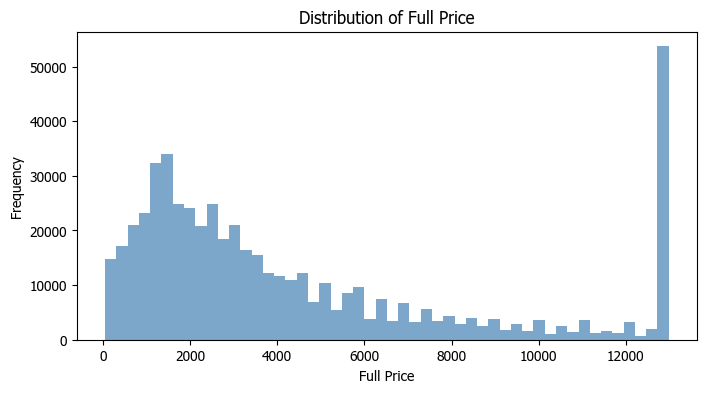

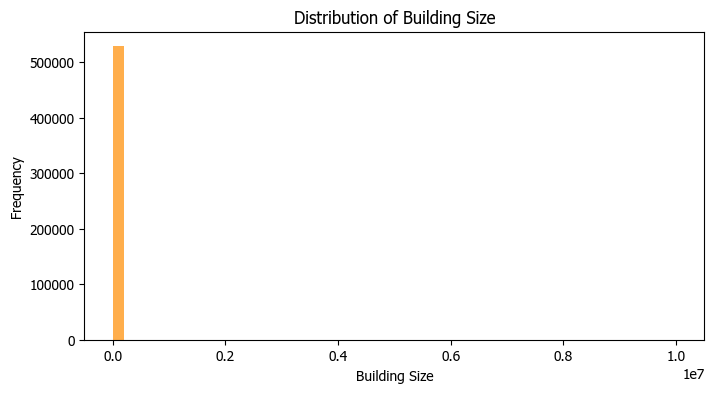

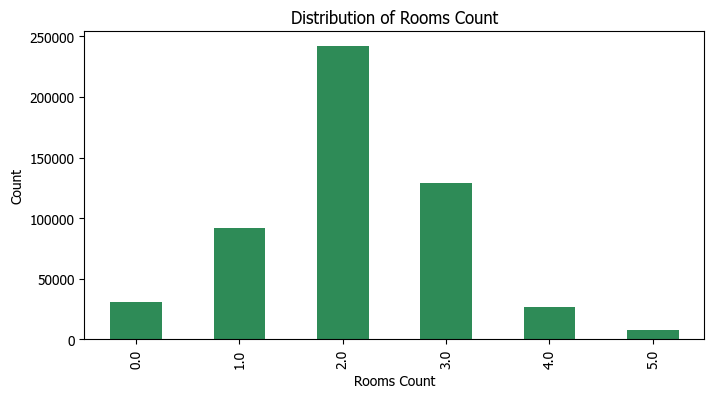

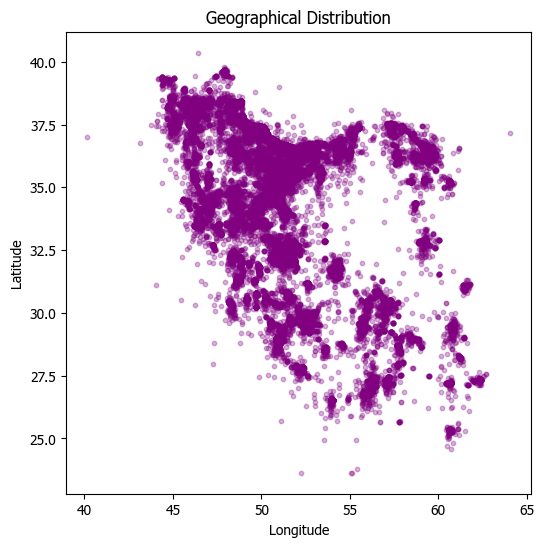

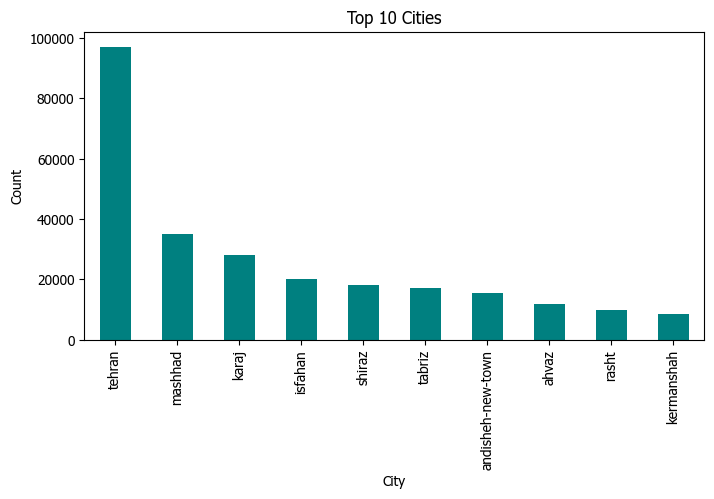

In [1326]:
import matplotlib.pyplot as plt

# Distribution: full_price
plt.figure(figsize=(8, 4))
df2['full_price'].plot(kind='hist', bins=50, alpha=0.7, color='steelblue')
plt.title("Distribution of Full Price")
plt.xlabel("Full Price")
plt.ylabel("Frequency")
plt.show()

# Distribution: building_size
plt.figure(figsize=(8, 4))
df2['building_size'].plot(kind='hist', bins=50, alpha=0.7, color='darkorange')
plt.title("Distribution of Building Size")
plt.xlabel("Building Size")
plt.ylabel("Frequency")
plt.show()

# Distribution: rooms_count
plt.figure(figsize=(8, 4))
df2['rooms_count'].value_counts().sort_index().plot(kind='bar', color='seagreen')
plt.title("Distribution of Rooms Count")
plt.xlabel("Rooms Count")
plt.ylabel("Count")
plt.show()

# Distribution: location (latitude & longitude scatter)
plt.figure(figsize=(6, 6))
plt.scatter(df2['location_longitude'], df2['location_latitude'], alpha=0.3, s=10, c='purple')
plt.title("Geographical Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Top cities
plt.figure(figsize=(8, 4))
df2['city_slug'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

In [1327]:
# Selecting key features for the real estate recommendation system
# Based on analysis and importance in user decision-making

selected_features = [
    'full_price',           # Price - most important factor
    'building_size',        # Building size - key factor
    'rooms_count',          # Number of rooms - related to family needs
    'location_latitude',    # Geographic location (latitude)
    'location_longitude',   # Geographic location (longitude)
    'floor',                # Floor - important for convenience
    'age_category',         # Property age - impacts quality and price
    'has_parking',          # Parking - essential in cities
    'has_elevator',         # Elevator - important for upper floors
    'total_floors_count'    # Total floors - related to building type
]

# Create DataFrame with selected features
clustering_data = df2[selected_features].copy()

## Part 2: K-means Implementation with k=10 and UTM Conversion


In [1328]:
# Install and import required libraries
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import pyproj
from pyproj import Proj
import warnings
warnings.filterwarnings('ignore')

# Display settings
plt.rcParams['font.family'] = ['Tahoma']

In [1329]:
# Convert geographic coordinates to UTM
def convert_to_utm(lat, lon):
    """
    Convert geographic coordinates (latitude and longitude) to UTM.
    """
    # Determine appropriate UTM zone for Iran (zones 39N and 40N)
    # Most of Iran falls in zone 39N
    utm_zone = 39
    
    # Create UTM projector
    utm_proj = Proj(proj='utm', zone=utm_zone, ellps='WGS84', preserve_units=False)
    
    # Convert coordinates
    utm_x, utm_y = utm_proj(lon, lat)
    
    return utm_x, utm_y

# Converting geographic coordinates to UTM
print("Converting geographic coordinates to UTM...")

# Drop rows without geographic coordinates
data_with_coords = clustering_data.dropna(subset=['location_latitude', 'location_longitude']).copy()

print(f"Number of records with coordinates: {len(data_with_coords)}")

# Convert coordinates
utm_x_list = []
utm_y_list = []

for idx, row in data_with_coords.iterrows():
    utm_x, utm_y = convert_to_utm(row['location_latitude'], row['location_longitude'])
    utm_x_list.append(utm_x)
    utm_y_list.append(utm_y)

# Add UTM coordinates to DataFrame
data_with_coords['utm_x'] = utm_x_list
data_with_coords['utm_y'] = utm_y_list

print("UTM coordinate conversion completed.")
print(f"Sample UTM coordinates:")
print(f"UTM X: {data_with_coords['utm_x'].head()}")
print(f"UTM Y: {data_with_coords['utm_y'].head()}")

Converting geographic coordinates to UTM...
Number of records with coordinates: 529131
UTM coordinate conversion completed.
Sample UTM coordinates:
UTM X: 0    5.401065e+05
1    1.273268e+06
2    5.457116e+05
3    4.814371e+05
4    1.268366e+06
Name: utm_x, dtype: float64
UTM Y: 0    3.959026e+06
1    4.048504e+06
2    3.954101e+06
3    3.952066e+06
4    4.054811e+06
Name: utm_y, dtype: float64


In [1330]:
# Prepare data for clustering
# Normalize data for K-means

# Select numerical features for normalization
numerical_features = ['full_price', 'building_size', 'rooms_count', 
                      'location_latitude', 'location_longitude', 'floor', 
                      'age_category', 'total_floors_count', 'utm_x', 'utm_y']

# Convert boolean features to numeric
data_with_coords['has_parking_num'] = data_with_coords['has_parking'].astype(int)
data_with_coords['has_elevator_num'] = data_with_coords['has_elevator'].astype(int)

# Create final DataFrame for clustering
features_for_clustering = numerical_features + ['has_parking_num', 'has_elevator_num']
clustering_df = data_with_coords[features_for_clustering].copy()

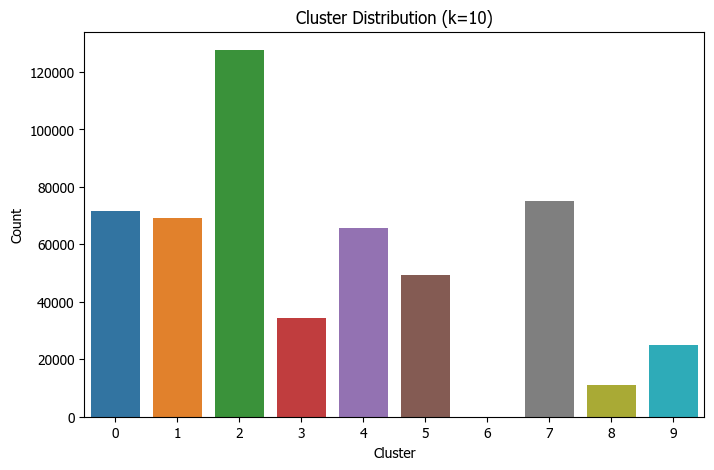

In [1331]:
# Normalize the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_df)

# Run K-means with k=10
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster_labels_10 = kmeans_10.fit_predict(clustering_scaled)

# Add cluster labels to the DataFrame
data_with_coords_clusters = data_with_coords.loc[clustering_df.index].copy()
data_with_coords_clusters['cluster'] = cluster_labels_10

# Plot cluster distribution
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', data=data_with_coords_clusters, palette='tab10')
plt.title("Cluster Distribution (k=10)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate cluster centers in original feature space (before normalization)
cluster_centers_original = []
for i in range(10):
    cluster_data = clustering_df[cluster_labels_10 == i]
    center = cluster_data.mean()
    cluster_centers_original.append(center)

cluster_centers_df = pd.DataFrame(cluster_centers_original)

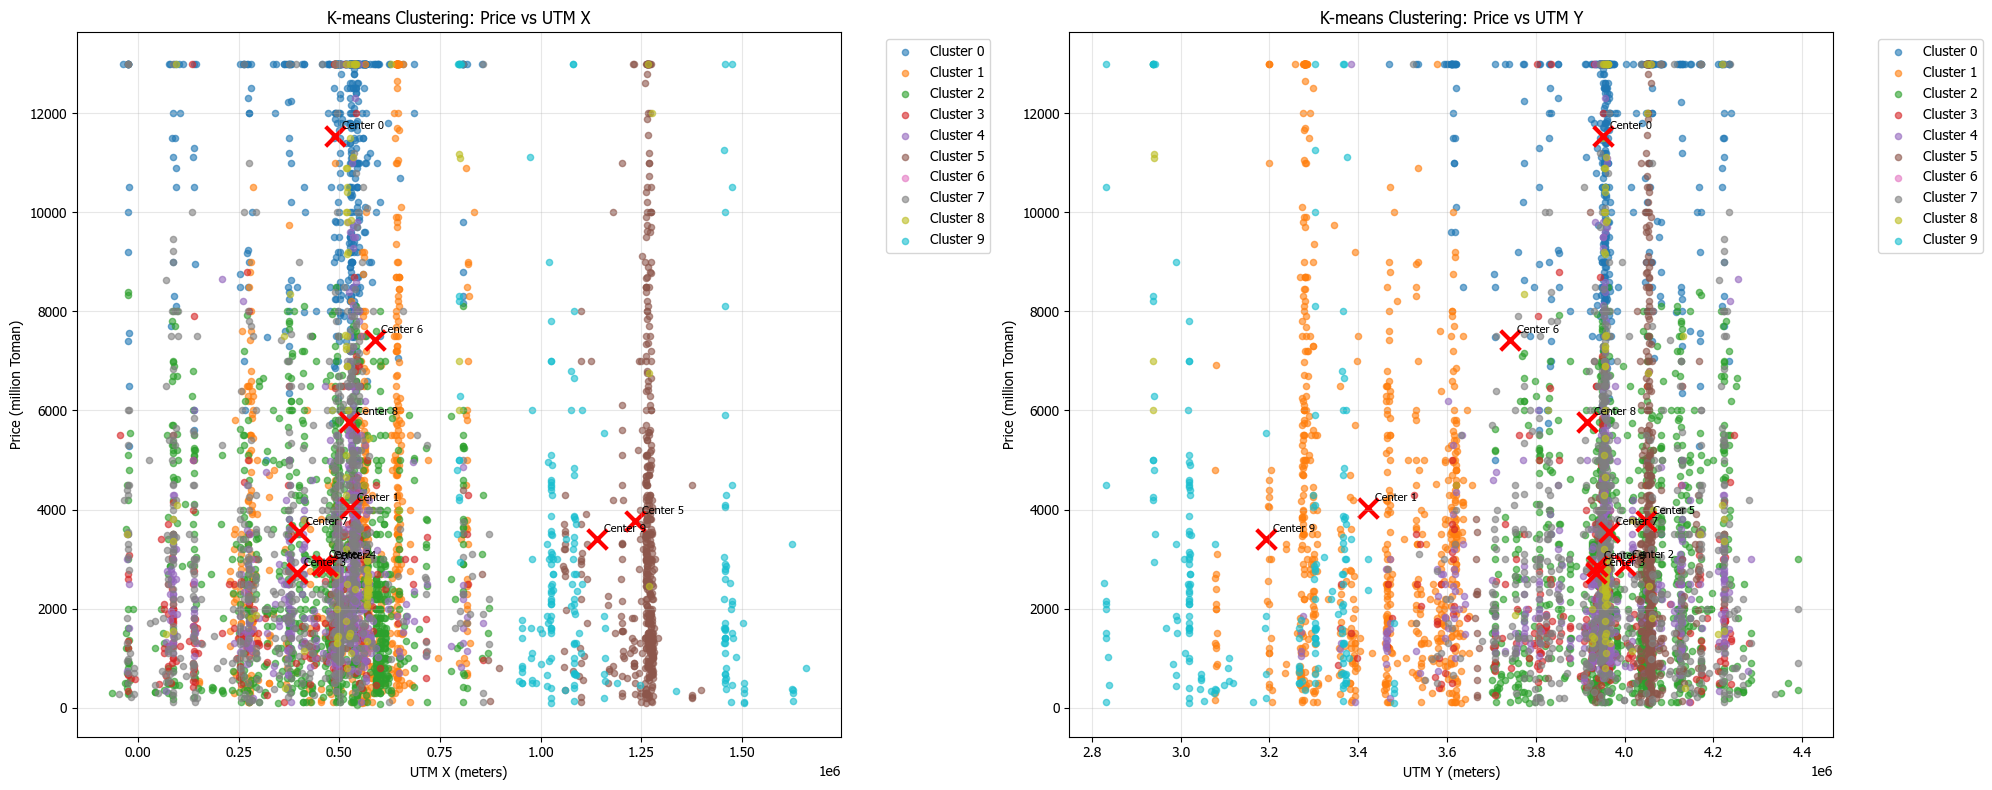

In [1332]:
# Scatter plot for K-means results
# Displaying two features: Price vs UTM coordinates

# Random sampling for better visualization
sample_size = min(5000, len(data_with_coords_clean))
sample_indices = np.random.choice(len(data_with_coords_clean), sample_size, replace=False)
sample_data = data_with_coords_clean.iloc[sample_indices]

# Create subplot to show two charts
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First plot: Price vs UTM X
colors = plt.cm.tab10(np.linspace(0, 1, 10))
for i in range(10):
    cluster_data = sample_data[sample_data['cluster'] == i]
    axes[0].scatter(cluster_data['utm_x'], cluster_data['full_price'], 
                   c=[colors[i]], label=f'Cluster {i}', alpha=0.6, s=20)

# Plot cluster centers
for i in range(10):
    center_x = cluster_centers_df.iloc[i]['utm_x']
    center_price = cluster_centers_df.iloc[i]['full_price']
    axes[0].scatter(center_x, center_price, c='red', marker='x', s=200, linewidths=3)
    axes[0].annotate(f'Center {i}', (center_x, center_price), 
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[0].set_xlabel('UTM X (meters)')
axes[0].set_ylabel('Price (million Toman)')
axes[0].set_title('K-means Clustering: Price vs UTM X')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Second plot: Price vs UTM Y
for i in range(10):
    cluster_data = sample_data[sample_data['cluster'] == i]
    axes[1].scatter(cluster_data['utm_y'], cluster_data['full_price'], 
                   c=[colors[i]], label=f'Cluster {i}', alpha=0.6, s=20)

# Plot cluster centers
for i in range(10):
    center_y = cluster_centers_df.iloc[i]['utm_y']
    center_price = cluster_centers_df.iloc[i]['full_price']
    axes[1].scatter(center_y, center_price, c='red', marker='x', s=200, linewidths=3)
    axes[1].annotate(f'Center {i}', (center_y, center_price), 
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1].set_xlabel('UTM Y (meters)')
axes[1].set_ylabel('Price (million Toman)')
axes[1].set_title('K-means Clustering: Price vs UTM Y')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 3: Elbow Method for k Selection


In [1333]:
# Calculating WCSS for different k values (1 to 20)
print("Calculating WCSS for different k values...")

k_range = range(1, 21)
wcss_values = []
silhouette_scores = []

# For faster computation, sample the data
sample_size_elbow = min(10000, len(clustering_scaled))
sample_indices_elbow = np.random.choice(len(clustering_scaled), sample_size_elbow, replace=False)
clustering_scaled_sample = clustering_scaled[sample_indices_elbow]

print(f"Using a sample of {sample_size_elbow} points for faster computation")

for k in k_range:
    print(f"Computing for k={k}...")
    
    if k == 1:
        # For k=1, WCSS is the sum of squared deviations from the overall mean
        center = clustering_scaled_sample.mean(axis=0)
        wcss = np.sum((clustering_scaled_sample - center) ** 2)
        wcss_values.append(wcss)
        silhouette_scores.append(0)  # silhouette score is undefined for k=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(clustering_scaled_sample)
        
        # Calculate WCSS
        wcss = kmeans.inertia_
        wcss_values.append(wcss)
        
        # Calculate Silhouette Score
        if k < len(clustering_scaled_sample):  # must be less than the number of points
            sil_score = silhouette_score(clustering_scaled_sample, cluster_labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(0)

print("Calculations completed.")

Calculating WCSS for different k values...
Using a sample of 10000 points for faster computation
Computing for k=1...
Computing for k=2...
Computing for k=3...
Computing for k=4...
Computing for k=5...
Computing for k=6...
Computing for k=7...
Computing for k=8...
Computing for k=9...
Computing for k=10...
Computing for k=11...
Computing for k=12...
Computing for k=13...
Computing for k=14...
Computing for k=15...
Computing for k=16...
Computing for k=17...
Computing for k=18...
Computing for k=19...
Computing for k=20...
Calculations completed.


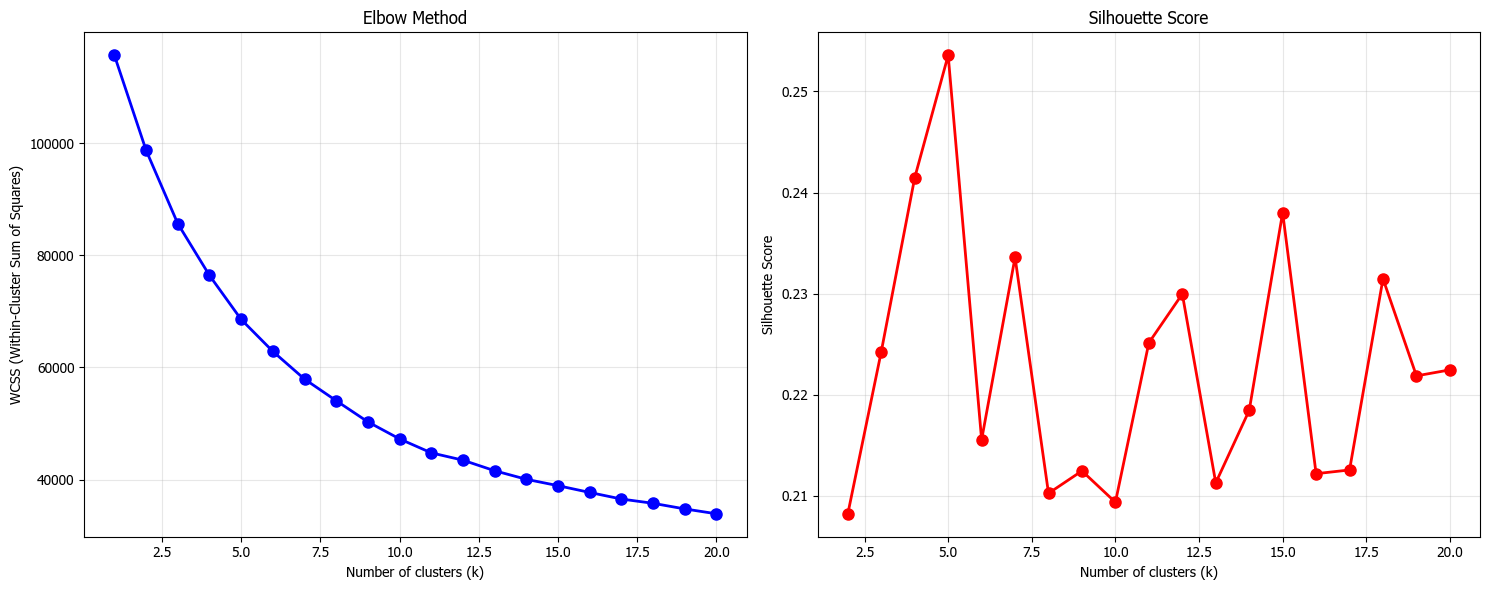

Analysis Results:
k	WCSS		Silhouette Score
1	115730.86		-
2	98780.27		0.2082
3	85686.67		0.2243
4	76439.37		0.2415
5	68580.63		0.2536
6	62877.40		0.2156
7	57930.52		0.2336
8	54069.81		0.2103
9	50292.97		0.2125
10	47252.14		0.2094
11	44763.82		0.2251
12	43455.70		0.2300
13	41569.39		0.2113
14	40041.41		0.2185
15	38905.54		0.2380
16	37695.68		0.2122
17	36520.70		0.2126
18	35756.97		0.2315
19	34754.83		0.2219
20	33885.10		0.2225

Analysis of optimal k selection:
Best k based on Silhouette Score: 5 (Score: 0.2536)

WCSS decrease rate:
k=2: Decrease=16950.59
k=3: Decrease=13093.60, Rate of change: 22.8%
k=4: Decrease=9247.30, Rate of change: 29.4%
k=5: Decrease=7858.75, Rate of change: 15.0%
k=6: Decrease=5703.23, Rate of change: 27.4%
k=7: Decrease=4946.88, Rate of change: 13.3%
k=8: Decrease=3860.70, Rate of change: 22.0%
k=9: Decrease=3776.84, Rate of change: 2.2%
k=10: Decrease=3040.83, Rate of change: 19.5%
k=11: Decrease=2488.32, Rate of change: 18.2%
k=12: Decrease=1308.12, Rate of c

In [1334]:
# Plotting Elbow Method and Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# WCSS plot (Elbow Method)
axes[0].plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)

# Calculate WCSS decrease rate to identify the elbow
wcss_diff = []
for i in range(1, len(wcss_values)):
    diff = wcss_values[i-1] - wcss_values[i]
    wcss_diff.append(diff)

# Silhouette Score plot
axes[1].plot(k_range[1:], silhouette_scores[1:], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display numeric results
print("Analysis Results:")
print("="*50)
print("k\tWCSS\t\tSilhouette Score")
print("="*50)
for i, k in enumerate(k_range):
    if i == 0:
        print(f"{k}\t{wcss_values[i]:.2f}\t\t-")
    else:
        print(f"{k}\t{wcss_values[i]:.2f}\t\t{silhouette_scores[i]:.4f}")

# Analyze best k
print("\n" + "="*50)
print("Analysis of optimal k selection:")
print("="*50)

# Best k based on Silhouette Score
best_k_silhouette = k_range[1:][np.argmax(silhouette_scores[1:])]
max_silhouette = max(silhouette_scores[1:])

print(f"Best k based on Silhouette Score: {best_k_silhouette} (Score: {max_silhouette:.4f})")

# Analyze WCSS decrease rate
print(f"\nWCSS decrease rate:")
for i, diff in enumerate(wcss_diff):
    k_val = k_range[i+1]
    if i > 0:
        change_rate = (wcss_diff[i-1] - diff) / wcss_diff[i-1] * 100
        print(f"k={k_val}: Decrease={diff:.2f}, Rate of change: {change_rate:.1f}%")
    else:
        print(f"k={k_val}: Decrease={diff:.2f}")